- ## NBA Positions

In [69]:
import time

In [70]:
# General Packages
import numpy as np
import pandas as pd
import pybaseball as pyb
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')

In [71]:
pd.set_option('display.max_columns', None)

In [72]:
from nba_api.stats import endpoints
data = endpoints.leagueleaders.LeagueLeaders(season = '2020-21',per_mode48='Totals').league_leaders.get_data_frame()

In [73]:
data = data[data['MIN']>1000]
data['REB'] = data['REB'] / data['MIN']
data['AST'] = data['AST'] / data['MIN']

In [59]:
pos = []
height = []
for i in data['PLAYER_ID'].values:
#for i in [203954,203507]:
    #print(i)
    temp = endpoints.commonplayerinfo.CommonPlayerInfo(player_id=str(i)).common_player_info.get_data_frame()
    pos.append(temp['POSITION'].values[0])
    height.append(temp['HEIGHT'].values[0])
    time.sleep(5)

In [74]:
#data = data[:50]
data['pos'] = pos
data['height'] = height

In [83]:
def pos_fixer(x):
    if x=='Center-Forward':
        return 'Center'
    if x=='Forward-Guard':
        return 'Forward'
    if x=='Guard-Forward':
        return 'Guard'
    if x=='Forward-Center':
        return 'Center'
    return x

In [84]:
data['pos2'] = data['pos'].apply(pos_fixer) 

In [87]:
def pltcolor(lst):
    cols=[]
    for l in data['pos2']:
        if l=='Guard':
            cols.append('green')
        elif l=='Forward':
            cols.append('blue')
        elif l == 'Center':
            cols.append('red')
    return cols
# Create the colors list using the function above
cols=pltcolor(data['pos2'])

['Guard' 'Center' 'Forward']


In [88]:
data['feet'] = data['height'].str.split('-').str[0]
data['in'] = data['height'].str.split('-').str[1]

data['height_in'] = data['feet'].astype(float)*12 + data['in'].astype(float)

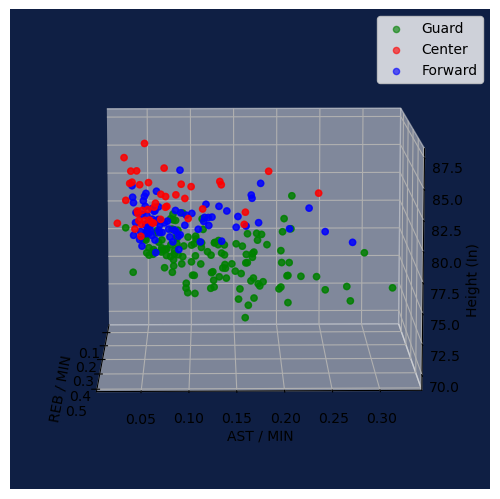

In [91]:
# First import everthing you need
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D

# Create a figure and a 3D Axes
fig = plt.figure()
ax = Axes3D(fig)

# Create an init function and the animate functions.
# Both are explained in the tutorial. Since we are changing
# the the elevation and azimuth and no objects are really
# changed on the plot we don't have to return anything from
# the init and animate function. (return value is explained
# in the tutorial.
cols_unique = ['blue',  'green',  'red']
def init():
    guard = ax.scatter(data[data['pos2']=='Guard']['REB'], data[data['pos2']=='Guard']['AST'], data[data['pos2']=='Guard']['height_in'], marker='o', s=20, color='green', alpha=0.6,label='Guard')
    
    center = ax.scatter(data[data['pos2']=='Center']['REB'], data[data['pos2']=='Center']['AST'], data[data['pos2']=='Center']['height_in'], marker='o', s=20, color='red', alpha=0.6,label='Center')
    
    forward = ax.scatter(data[data['pos2']=='Forward']['REB'], data[data['pos2']=='Forward']['AST'], data[data['pos2']=='Forward']['height_in'], marker='o', s=20, color='blue', alpha=0.6,label='Forward')
    
    ax.legend(handles=[guard,center,forward],loc=1)
    ax.set_facecolor(color = '#0f1f44')
    
    ax.set_xlabel('REB / MIN')
    ax.set_ylabel('AST / MIN')
    ax.set_zlabel('Height (In)')
    
    return fig,

def animate(i):
    ax.view_init(elev=10., azim=i)
    return fig,

# Animate
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=360, interval=20, blit=True)
# Save
anim.save('nba_reb_ast_height.mp4', fps=30, extra_args=['-vcodec', 'libx264'])